Kmeans

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]] 

Clustering based on the two most correlated features:  petal width (cm)  and  petal length (cm)
Colors correspond to the KMeans predictions


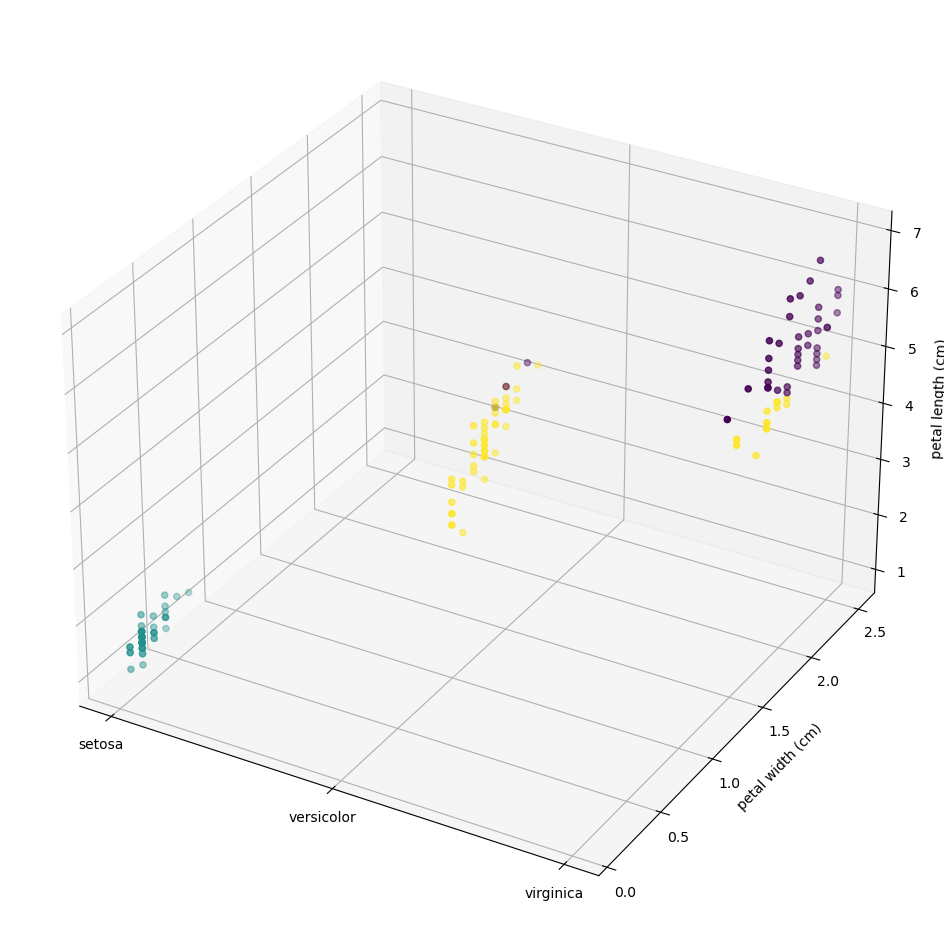

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

iris = load_iris(as_frame=True)
x = iris.data
y = iris.target
k = 3

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

print("Kmeans\n")
print("Labels:", labels)
print("Centroids:", centroids, "\n")

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = y
c = df.corr().abs().nlargest(3, 'target')
print("Clustering based on the two most correlated features: ", c.index[1], " and ", c.index[2])
print("Colors correspond to the KMeans predictions")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[c.index[0]],
           df[c.index[1]],
           df[c.index[2]],
           c=labels)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(iris.target_names)
ax.set_ylabel(c.index[1])
ax.set_zlabel(c.index[2])
plt.show()